In [323]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [325]:
labels=pd.read_csv('labels.csv')
values=pd.read_csv('values.csv')


In [327]:
labels.head()

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


In [329]:
values.head()


,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [331]:
values = values.rename(columns={'slope_of_peak_exercise_st_segment': 'slope', 'resting_blood_pressure': 'bp','chest_pain_type': 'pain', 'num_major_vessels': 'vessels','fasting_blood_sugar_gt_120_mg_per_dl': 'fastsuger','resting_ekg_results': 'ekg','serum_cholesterol_mg_per_dl': 'cholesterol', 'oldpeak_eq_st_depression': 'depression','max_heart_rate_achieved': 'heartrate','exercise_induced_angina': 'exercise'})

In [333]:
values.columns

Index(['patient_id', 'slope', 'thal', 'bp', 'pain', 'vessels', 'fastsuger',
       'ekg', 'cholesterol', 'depression', 'sex', 'age', 'heartrate',
       'exercise'],
      dtype='object')

In [335]:
values.head()

,patient_id,slope,thal,bp,pain,vessels,fastsuger,ekg,cholesterol,depression,sex,age,heartrate,exercise
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [337]:
values.shape

(180, 14)

In [339]:
values=values.drop(columns=['patient_id'])

In [341]:
values

,slope,thal,bp,pain,vessels,fastsuger,ekg,cholesterol,depression,sex,age,heartrate,exercise
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,1,normal,124,3,2,1,0,255,0.0,1,48,175,0


In [343]:
values['thal'].value_counts()

thal
normal               98
reversible_defect    74
fixed_defect          8
Name: count, dtype: int64

In [345]:
lables=labels.drop(columns=['patient_id'])
lables.head()

,heart_disease_present
0,0
1,0
2,1
3,1
4,0


In [356]:
lables.rename(columns={'heart_disease_present':'diseases'})

,diseases
0,0
1,0
2,1
3,1
4,0
...,...
175,1
176,1
177,1
178,0


In [360]:
finaldata=pd.concat([values,lables], axis=1)

In [362]:
finaldata

,slope,thal,bp,pain,vessels,fastsuger,ekg,cholesterol,depression,sex,age,heartrate,exercise,heart_disease_present
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


In [364]:
finaldata['thal'].value_counts()

thal
normal               98
reversible_defect    74
fixed_defect          8
Name: count, dtype: int64

In [366]:
finaldata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   slope                  180 non-null    int64  
 1   thal                   180 non-null    object 
 2   bp                     180 non-null    int64  
 3   pain                   180 non-null    int64  
 4   vessels                180 non-null    int64  
 5   fastsuger              180 non-null    int64  
 6   ekg                    180 non-null    int64  
 7   cholesterol            180 non-null    int64  
 8   depression             180 non-null    float64
 9   sex                    180 non-null    int64  
 10  age                    180 non-null    int64  
 11  heartrate              180 non-null    int64  
 12  exercise               180 non-null    int64  
 13  heart_disease_present  180 non-null    int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 19.8+ KB

In [387]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
encoder = LabelEncoder()

# Apply encoding to the 'thal' column
finaldata['thal'] = encoder.fit_transform(data['thal'])

print(finaldata)

     slope  thal   bp  pain  vessels  fastsuger  ekg  cholesterol  depression  \
0        1     1  128     2        0          0    2          308         0.0   
1        2     1  110     3        0          0    0          214         1.6   
2        1     1  125     4        3          0    2          304         0.0   
3        1     2  152     4        0          0    0          223         0.0   
4        3     2  178     1        0          0    2          270         4.2   
..     ...   ...  ...   ...      ...        ...  ...          ...         ...   
175      2     2  125     4        2          1    0          254         0.2   
176      2     1  180     4        0          0    1          327         3.4   
177      2     2  125     3        0          0    0          309         1.8   
178      1     1  124     3        2          1    0          255         0.0   
179      1     1  160     3        1          0    0          201         0.0   

     sex  age  heartrate  e

In [389]:
finaldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   slope                  180 non-null    int64  
 1   thal                   180 non-null    int32  
 2   bp                     180 non-null    int64  
 3   pain                   180 non-null    int64  
 4   vessels                180 non-null    int64  
 5   fastsuger              180 non-null    int64  
 6   ekg                    180 non-null    int64  
 7   cholesterol            180 non-null    int64  
 8   depression             180 non-null    float64
 9   sex                    180 non-null    int64  
 10  age                    180 non-null    int64  
 11  heartrate              180 non-null    int64  
 12  exercise               180 non-null    int64  
 13  heart_disease_present  180 non-null    int64  
dtypes: float64(1), int32(1), int64(12)
memory usage: 19.1 KB


In [391]:
finaldata

,slope,thal,bp,pain,vessels,fastsuger,ekg,cholesterol,depression,sex,age,heartrate,exercise,heart_disease_present
0,1,1,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,1,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,1,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,2,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,2,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,2,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2,1,180,4,0,0,1,327,3.4,0,55,117,1,1
177,2,2,125,3,0,0,0,309,1.8,1,64,131,1,1
178,1,1,124,3,2,1,0,255,0.0,1,48,175,0,0


In [393]:
finaldata.shape

(180, 14)

In [395]:
finaldata.isnull().sum()

slope                    0
thal                     0
bp                       0
pain                     0
vessels                  0
fastsuger                0
ekg                      0
cholesterol              0
depression               0
sex                      0
age                      0
heartrate                0
exercise                 0
heart_disease_present    0
dtype: int64

In [409]:
finaldata.duplicated().sum()

0

In [419]:
data.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000


In [425]:
finaldata.corr()

,slope,thal,bp,pain,vessels,fastsuger,ekg,cholesterol,depression,sex,age,heartrate,exercise,heart_disease_present
slope,1.000000,0.154101,0.098287,0.121207,0.076832,0.050199,0.172191,-0.032348,0.615948,0.093340,0.169918,-0.418102,0.225459,0.344224
thal,0.154101,1.000000,-0.006088,0.269583,0.174107,-0.070225,-0.052171,0.046448,0.251972,0.265420,-0.007934,-0.142098,0.360395,0.447214
bp,0.098287,-0.006088,1.000000,-0.029296,0.042388,0.166570,0.078986,0.144881,0.219026,-0.055589,0.284402,-0.017521,0.123397,0.078506
pain,0.121207,0.269583,-0.029296,1.000000,0.249061,-0.088992,0.033379,0.061213,0.080799,0.086057,0.085001,-0.301792,0.346266,0.412829
vessels,0.076832,0.174107,0.042388,0.249061,1.000000,0.169792,0.096656,0.098348,0.214062,0.073107,0.347355,-0.275687,0.153407,0.421519
fastsuger,0.050199,-0.070225,0.166570,-0.088992,0.169792,1.000000,0.053864,0.027560,-0.039055,0.066010,0.176101,0.058369,-0.005956,0.003379
ekg,0.172191,-0.052171,0.078986,0.033379,0.096656,0.053864,1.000000,0.170839,0.097321,0.045786,0.126856,-0.102766,0.037773,0.145933
cholesterol,-0.032348,0.046448,0.144881,0.061213,0.098348,0.027560,0.170839,1.000000,-0.021932,-0.152296,0.236211,-0.071038,0.083139,0.079775
depression,0.615948,0.251972,0.219026,0.080799,0.214062,-0.039055,0.097321,-0.021932,1.000000,0.099374,0.189700,-0.341045,0.249167,0.382930
sex,0.093340,0.265420,-0.055589,0.086057,0.073107,0.066010,0.045786,-0.152296,0.099374,1.000000,-0.148997,-0.053960,0.251096,0.335421


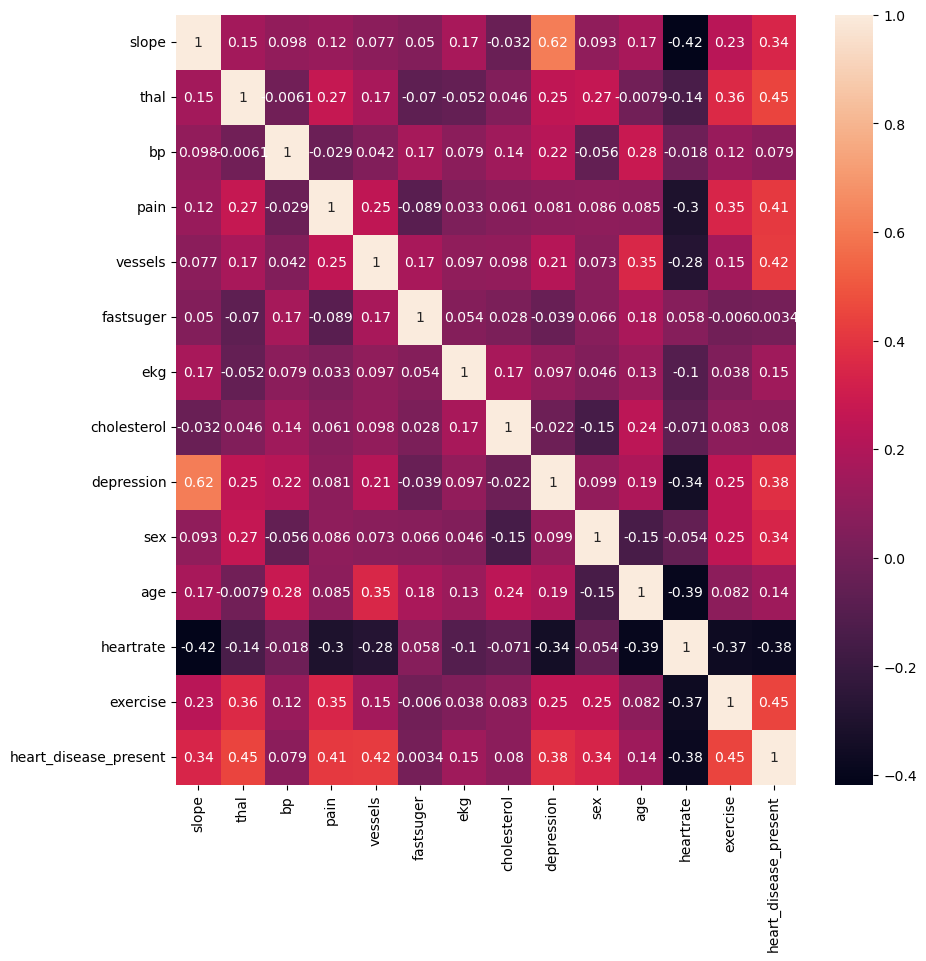

In [439]:
plt.figure(figsize=(10,10))
sns.heatmap(finaldata.corr(),annot=True)
plt.show()

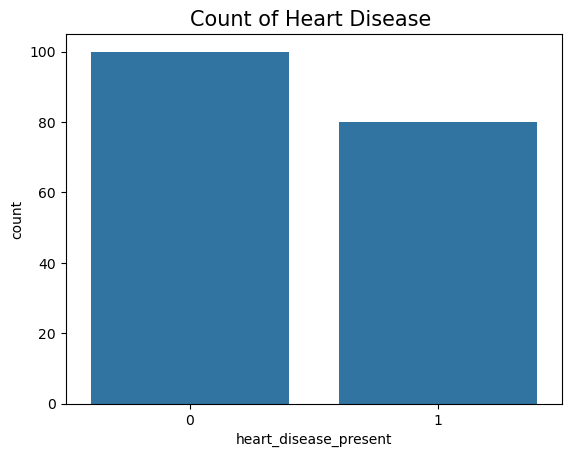

In [453]:
sns.countplot(x='heart_disease_present',data=finaldata)
plt.title('Count of Heart Disease ', fontsize=15)
plt.show()

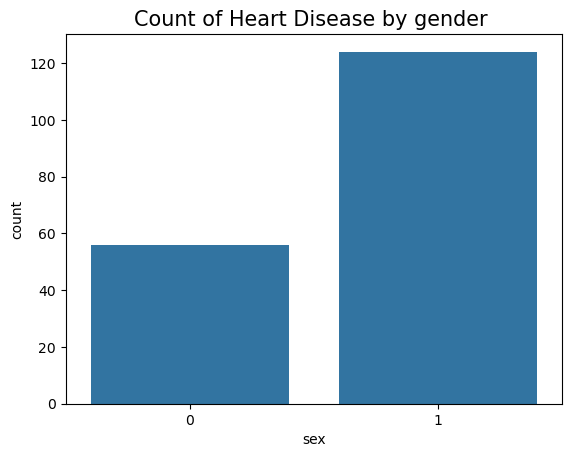

In [459]:
sns.countplot(x='sex',data=finaldata)
plt.title('Count of Heart Disease by gender ', fontsize=15)
plt.show()

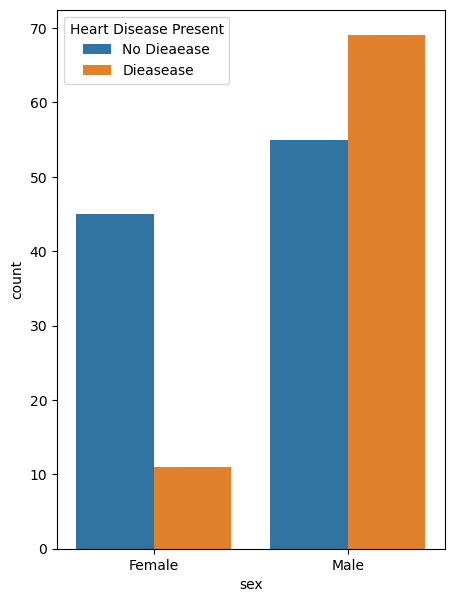

In [501]:

plt.figure(figsize=(5,7))
sns.countplot(x='sex',data=finaldata,hue='heart_disease_present')
plt.legend(title='Heart Disease Present', labels=['No Dieaease', 'Dieasease'], loc='upper left')
plt.xticks([0,1],['Female','Male'])
plt.show()

<Axes: xlabel='age', ylabel='Density'>

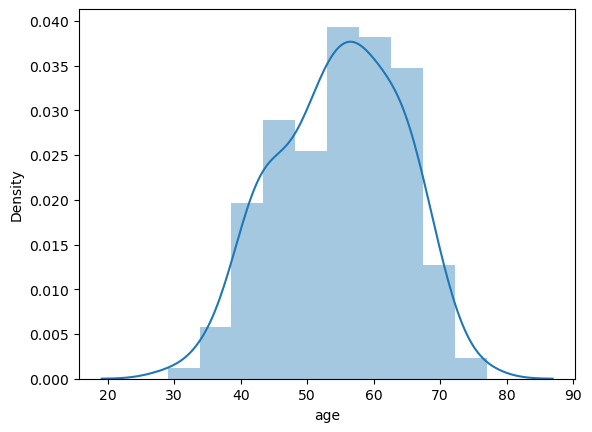

In [491]:
sns.distplot(finaldata['age'])

In [489]:
finaldata.columns

Index(['slope', 'thal', 'bp', 'pain', 'vessels', 'fastsuger', 'ekg',
       'cholesterol', 'depression', 'sex', 'age', 'heartrate', 'exercise',
       'heart_disease_present'],
      dtype='object')

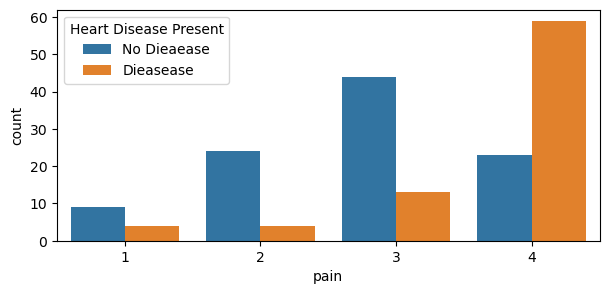

In [499]:

plt.figure(figsize=(7,3))
sns.countplot(x='pain',data=finaldata,hue='heart_disease_present')
plt.legend(title='Heart Disease Present', labels=['No Dieaease', 'Dieasease'], loc='upper left')
plt.show()

<Axes: >

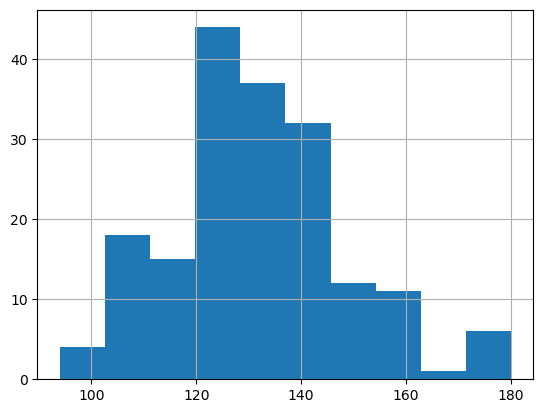

In [503]:
finaldata['bp'].hist()

<Axes: >

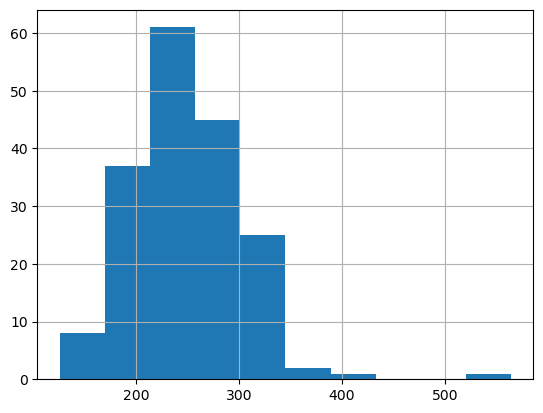

In [507]:
finaldata['cholesterol'].hist()

In [533]:
X=finaldata.iloc[:,:-1]
y=finaldata['heart_disease_present']

In [511]:
X

,slope,thal,bp,pain,vessels,fastsuger,ekg,cholesterol,depression,sex,age,heartrate,exercise
0,1,1,128,2,0,0,2,308,0.0,1,45,170,0
1,2,1,110,3,0,0,0,214,1.6,0,54,158,0
2,1,1,125,4,3,0,2,304,0.0,1,77,162,1
3,1,2,152,4,0,0,0,223,0.0,1,40,181,0
4,3,2,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,2,125,4,2,1,0,254,0.2,1,67,163,0
176,2,1,180,4,0,0,1,327,3.4,0,55,117,1
177,2,2,125,3,0,0,0,309,1.8,1,64,131,1
178,1,1,124,3,2,1,0,255,0.0,1,48,175,0


In [539]:
y

0      0
1      0
2      1
3      1
4      0
      ..
175    1
176    1
177    1
178    0
179    0
Name: heart_disease_present, Length: 180, dtype: int64

In [555]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [557]:
X_train.shape


(144, 13)

In [559]:
X_test.shape

(36, 13)

In [561]:
y_train

117    1
65     1
67     0
31     1
12     1
      ..
71     0
106    0
14     1
92     0
102    1
Name: heart_disease_present, Length: 144, dtype: int64

In [648]:
y_test

19     1
42     0
153    1
78     1
145    0
15     1
24     0
68     0
113    1
118    1
93     1
159    1
69     1
142    0
45     1
16     0
51     0
125    0
96     1
56     1
97     0
120    1
143    1
30     0
9      0
172    1
60     0
18     0
148    1
173    1
109    1
55     0
140    1
126    0
66     1
29     0
Name: heart_disease_present, dtype: int64

In [650]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler
X_test= scaler.transform(X_test)

In [652]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr

LogisticRegression()

In [654]:
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0], dtype=int64)

In [656]:
y_test

19     1
42     0
153    1
78     1
145    0
15     1
24     0
68     0
113    1
118    1
93     1
159    1
69     1
142    0
45     1
16     0
51     0
125    0
96     1
56     1
97     0
120    1
143    1
30     0
9      0
172    1
60     0
18     0
148    1
173    1
109    1
55     0
140    1
126    0
66     1
29     0
Name: heart_disease_present, dtype: int64

In [658]:
y_pred_prob=lr.predict_proba(X_test)
y_pred_prob

array([[0.94943581, 0.05056419],
       [0.97414953, 0.02585047],
       [0.52061396, 0.47938604],
       [0.00470532, 0.99529468],
       [0.96822764, 0.03177236],
       [0.09906328, 0.90093672],
       [0.951027  , 0.048973  ],
       [0.94512728, 0.05487272],
       [0.25831688, 0.74168312],
       [0.03489918, 0.96510082],
       [0.04969006, 0.95030994],
       [0.00885057, 0.99114943],
       [0.04850105, 0.95149895],
       [0.92763191, 0.07236809],
       [0.91085836, 0.08914164],
       [0.96689981, 0.03310019],
       [0.49520432, 0.50479568],
       [0.92077872, 0.07922128],
       [0.15755911, 0.84244089],
       [0.02480594, 0.97519406],
       [0.94307334, 0.05692666],
       [0.90822634, 0.09177366],
       [0.06075965, 0.93924035],
       [0.55542777, 0.44457223],
       [0.92369476, 0.07630524],
       [0.32905052, 0.67094948],
       [0.51650473, 0.48349527],
       [0.95524678, 0.04475322],
       [0.93389119, 0.06610881],
       [0.18592123, 0.81407877],
       [0.

In [660]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,accuracy_score
r2score=r2_score(y_test,y_pred)


R-squared: 0.32500000000000007


In [662]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8333333333333334

In [664]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.75      0.94      0.83        16
           1       0.94      0.75      0.83        20

    accuracy                           0.83        36
   macro avg       0.84      0.84      0.83        36
weighted avg       0.85      0.83      0.83        36



In [667]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Accuracy: 0.8055555555555556
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.94      0.81        16
           1       0.93      0.70      0.80        20

    accuracy                           0.81        36
   macro avg       0.82      0.82      0.81        36
weighted avg       0.84      0.81      0.80        36



In [670]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Create the model
svm_model = SVC(kernel='linear', random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Predict
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

Accuracy: 0.8055555555555556
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.88      0.80        16
           1       0.88      0.75      0.81        20

    accuracy                           0.81        36
   macro avg       0.81      0.81      0.81        36
weighted avg       0.82      0.81      0.81        36



In [672]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Create the model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

# Predict
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

Accuracy: 0.8611111111111112
Classification Report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.86        16
           1       1.00      0.75      0.86        20

    accuracy                           0.86        36
   macro avg       0.88      0.88      0.86        36
weighted avg       0.89      0.86      0.86        36



In [675]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Create the model
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Predict
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))

Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.81      0.74        16
           1       0.82      0.70      0.76        20

    accuracy                           0.75        36
   macro avg       0.75      0.76      0.75        36
weighted avg       0.76      0.75      0.75        36



In [678]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

# Create the model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

# Predict
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

Accuracy: 0.8055555555555556
Classification Report:
               precision    recall  f1-score   support

           0       0.70      1.00      0.82        16
           1       1.00      0.65      0.79        20

    accuracy                           0.81        36
   macro avg       0.85      0.82      0.80        36
weighted avg       0.86      0.81      0.80        36



In [681]:
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score

# Create the model
xgb_model = xgb.XGBClassifier(random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

Accuracy: 0.7777777777777778
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.88      0.78        16
           1       0.88      0.70      0.78        20

    accuracy                           0.78        36
   macro avg       0.79      0.79      0.78        36
weighted avg       0.80      0.78      0.78        36



In [705]:
from sklearn.model_selection import GridSearchCV
best_model = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred_best = best_model.predict(X_test_scaled)

# Evaluate the accuracy of the best model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_best)
print(f"Accuracy of the best model: {accuracy}")


AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [711]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the Logistic Regression model
lr = LogisticRegression()

# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'saga'],  # Optimization algorithms
    'max_iter': [100, 200, 300]  # Maximum number of iterations
}

# Step 2: Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Step 3: Fit the grid search on the training data
grid_search.fit(X_train, y_train)  # Ensure X_train_scaled and y_train are defined

# Step 4: Access the best estimator after fitting
best_model = grid_search.best_estimator_

# Step 5: Make predictions on the test data using the best model
y_pred_best = best_model.predict(X_test)

# Step 6: Evaluate the accuracy of the best model
from sklearn.metrics import accuracy_score
print(f"Accuracy of the best model: {accuracy_score(y_test, y_pred_best)}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Accuracy of the best model: 0.8611111111111112


In [715]:
# Once the grid search has completed, access the best estimator
best_model = grid_search.best_estimator_

# Print the best hyperparameters found during the search
print("Best Hyperparameters:", grid_search.best_params_)

# Make predictions with the best model
y_pred_best = best_model.predict(X_test)

# Evaluate the performance of the best model
from sklearn.metrics import accuracy_score, classification_report

# Calculate and print the accuracy
print(f"Accuracy of the best model: {accuracy_score(y_test, y_pred_best)}")

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred_best))


Best Hyperparameters: {'C': 0.1, 'max_iter': 100, 'solver': 'saga'}
Accuracy of the best model: 0.8611111111111112
Classification Report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.86        16
           1       1.00      0.75      0.86        20

    accuracy                           0.86        36
   macro avg       0.88      0.88      0.86        36
weighted avg       0.89      0.86      0.86        36

